In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
%pip install jupysql --upgrade duckdb-engine pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [33]:
%reload_ext sql

In [34]:
%sql duckdb:///../data/adidas.duckdb


In [5]:
%%sql
SELECT * FROM data_sales_adidas LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store
Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.3,In-store


In [6]:
result = %sql SELECT * FROM data_sales_adidas
df = result.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [7]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


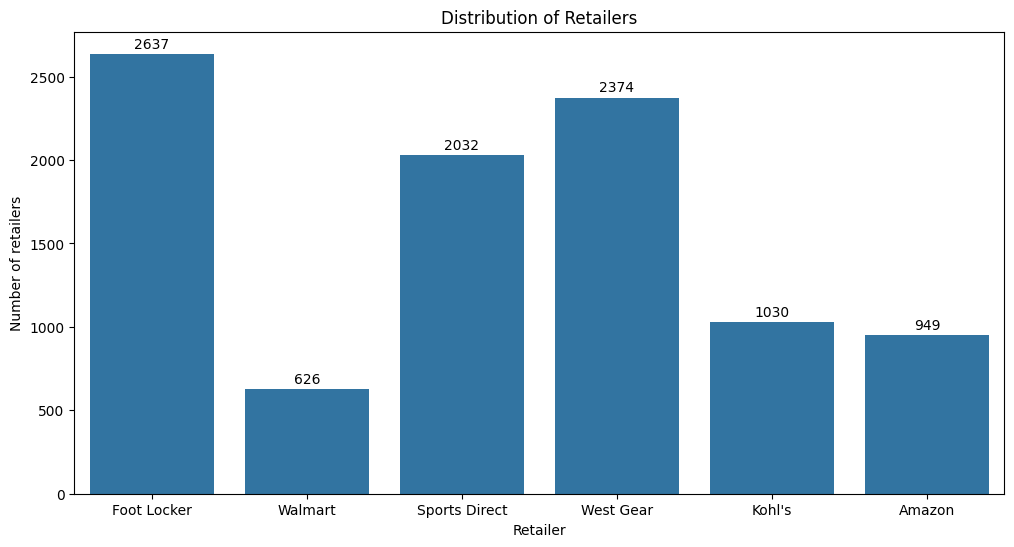

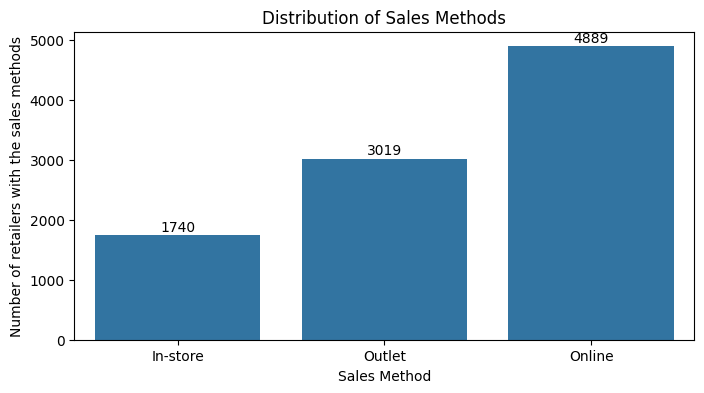

In [8]:
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(x='Retailer', data=df)
plt.title('Distribution of Retailers')
plt.ylabel('Number of retailers')

# Adding counts on top of bars as integers
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

# Countplot for Sales Method
plt.figure(figsize=(8, 4))
ax2 = sns.countplot(x='Sales Method', data=df)
plt.title('Distribution of Sales Methods')
plt.ylabel('Number of retailers with the sales methods')

# Adding counts on top of bars as integers
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()

In [9]:
#%sql duckdb:///../data/trends.duckdb

In [ ]:
#analysis of shopping_trends

In [10]:
%%sql
SELECT * FROM data_shopping_trends LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
result_trends = %sql SELECT * FROM data_shopping_trends
df_trends = result_trends.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [12]:
df_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


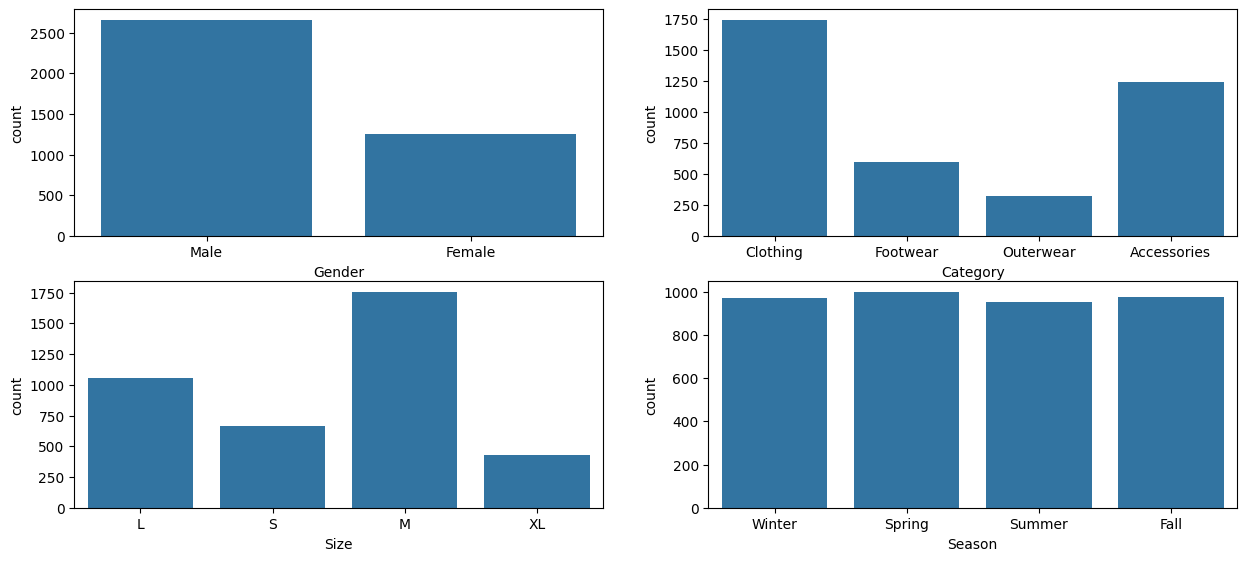

In [14]:
# 2. Categorical Variables
plt.figure(figsize=(15, 10))

#Number of Customers by gender
plt.subplot(3, 2, 1)
sns.countplot(x='Gender', data=df_trends)


#Number of products sold by category
plt.subplot(3, 2, 2)
sns.countplot(x='Category', data=df_trends)

#Number of products sold by size
plt.subplot(3, 2, 3)
sns.countplot(x='Size', data=df_trends)

#Number of products sold in the season
plt.subplot(3, 2, 4)
sns.countplot(x='Season', data=df_trends)

plt.show()

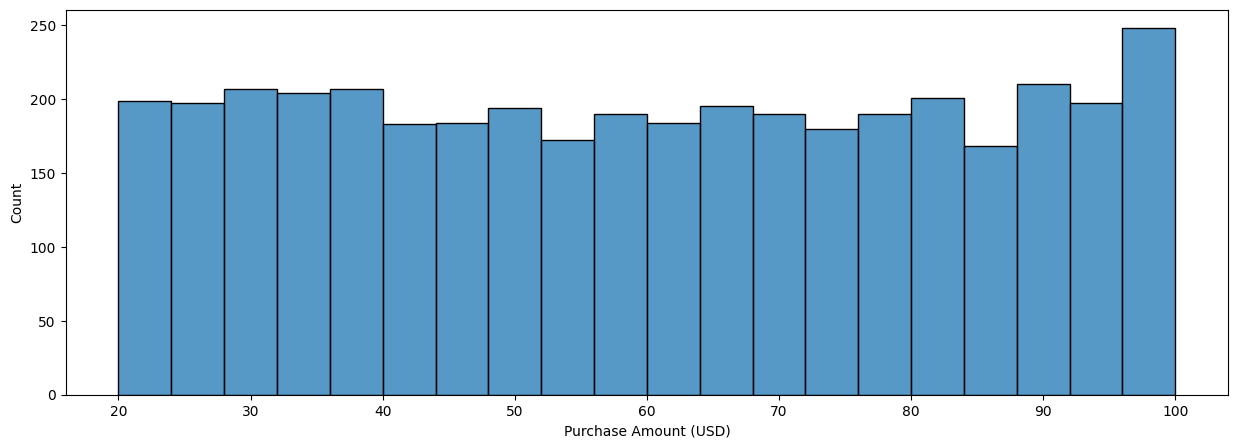

In [41]:
# 3. Purchase Behavior
plt.figure(figsize=(15, 5))

sns.histplot(df_trends['Purchase Amount (USD)'], bins=20)

plt.show()

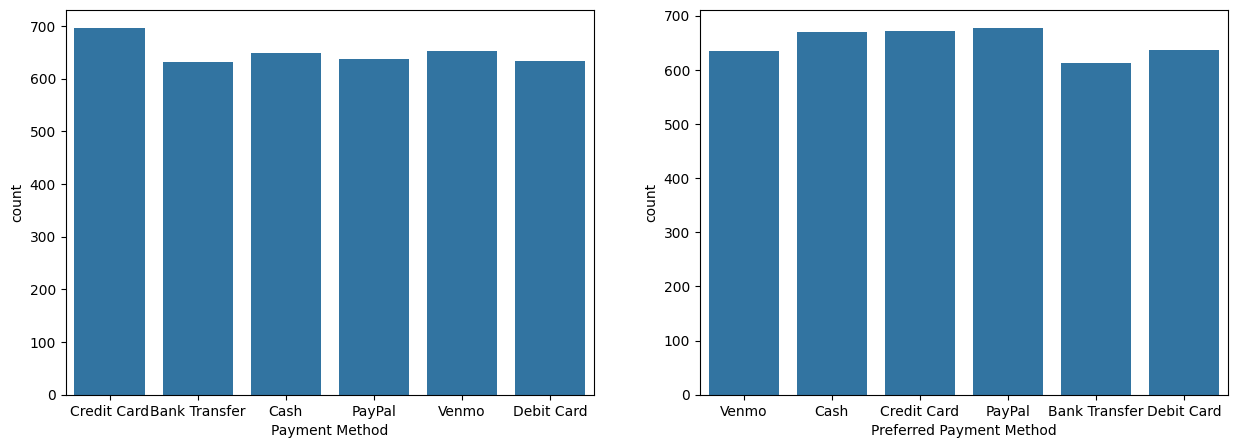

In [19]:
# 4. Payment Methods
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Payment Method', data=df_trends)

plt.subplot(1, 2, 2)
sns.countplot(x='Preferred Payment Method', data=df_trends)

plt.show()



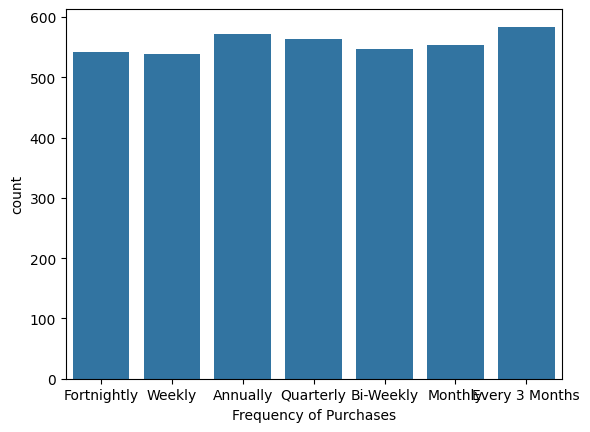

In [20]:
# 5. Frequency Analysis
sns.countplot(x='Frequency of Purchases', data=df_trends)
plt.show()



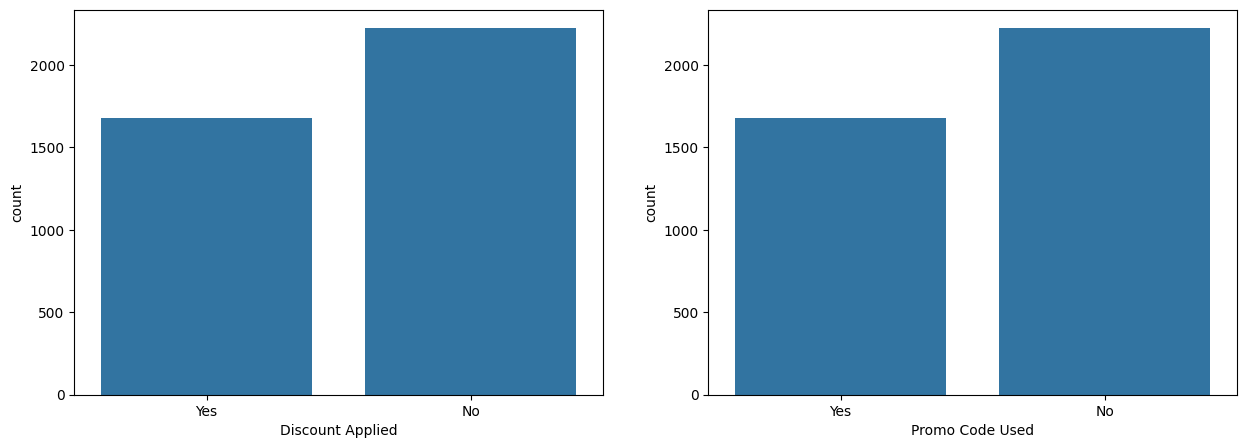

In [21]:
# 6. Discounts and Promotions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Discount Applied', data=df_trends)

plt.subplot(1, 2, 2)
sns.countplot(x='Promo Code Used', data=df_trends)

plt.show()



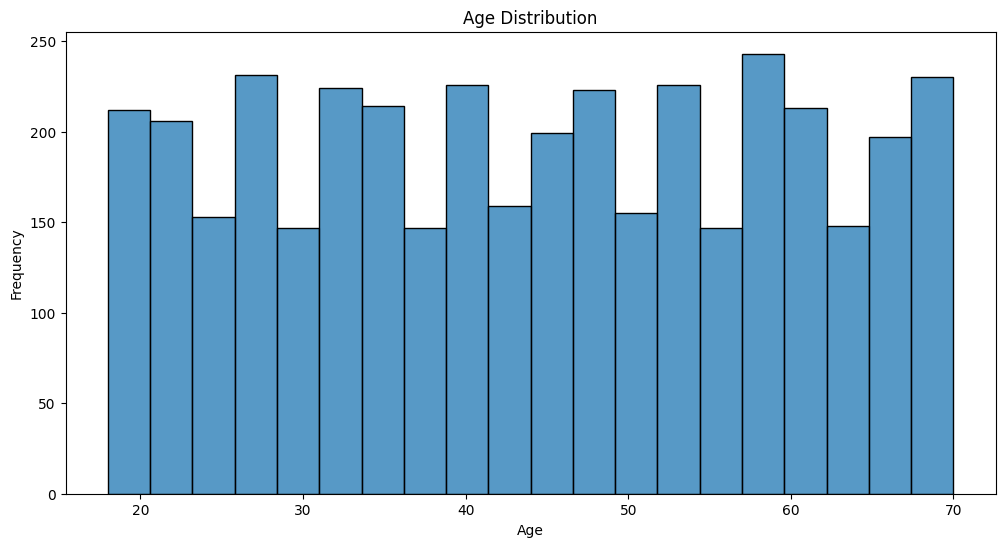

In [44]:
# Age Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df_trends['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



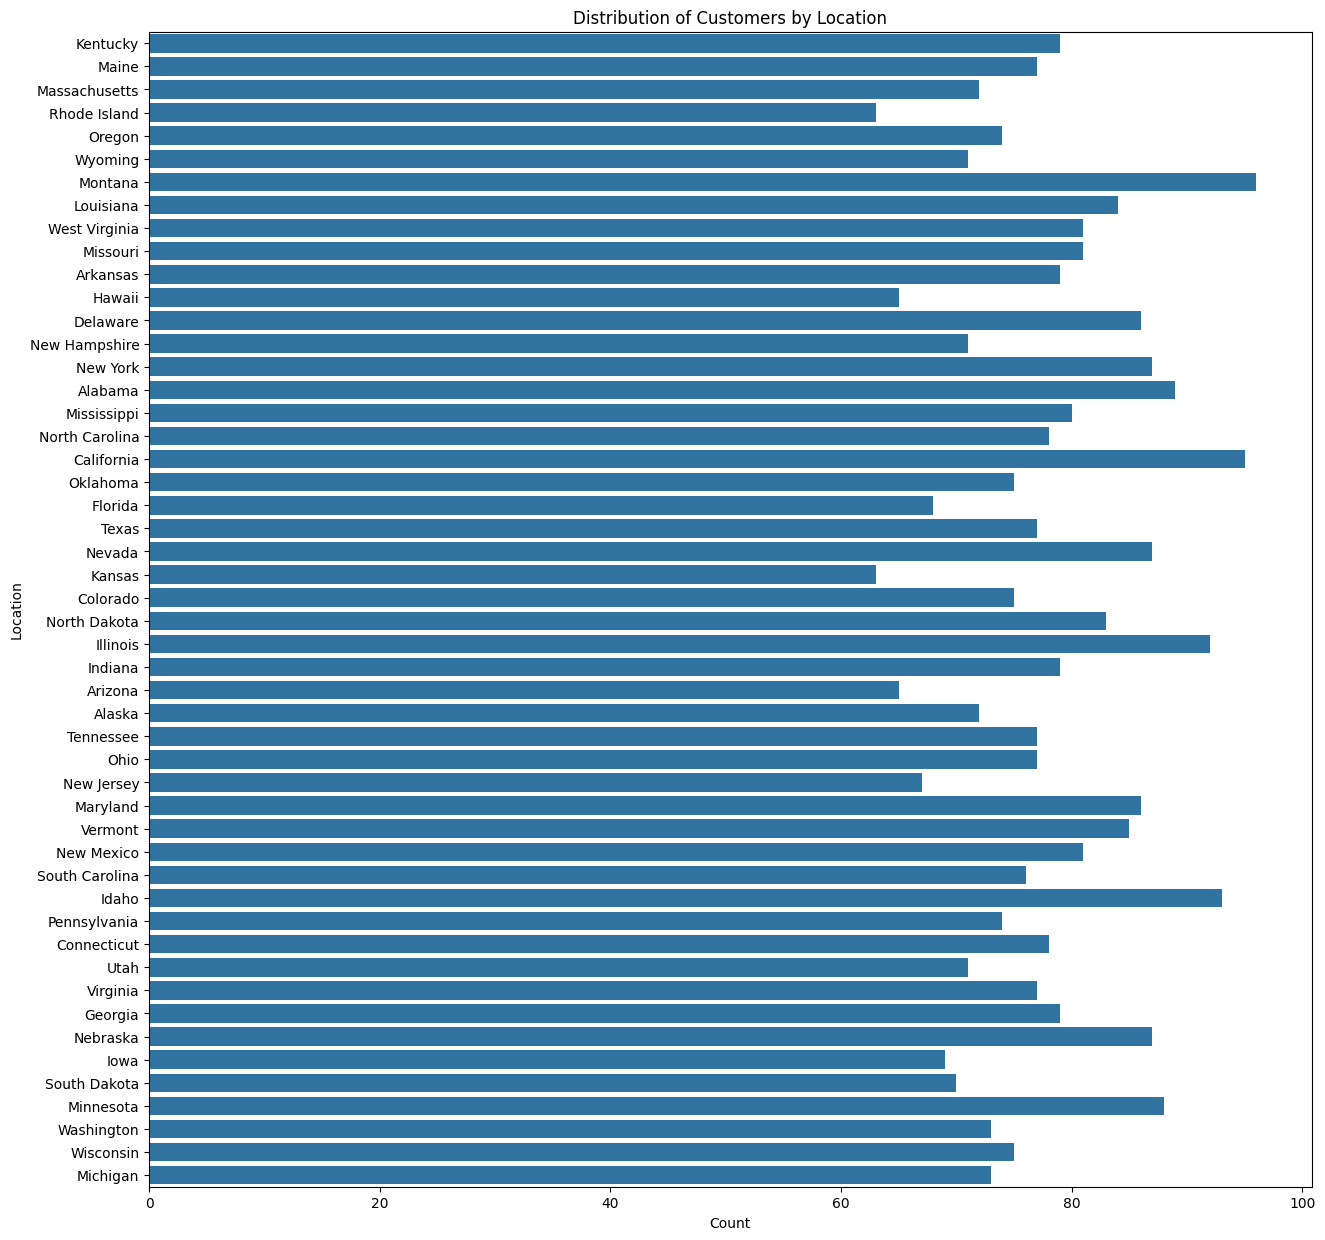

In [47]:
# 7. Geographical Analysis
plt.figure(figsize=(15,15))
sns.countplot(y='Location', data=df_trends)
plt.title('Distribution of Customers by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

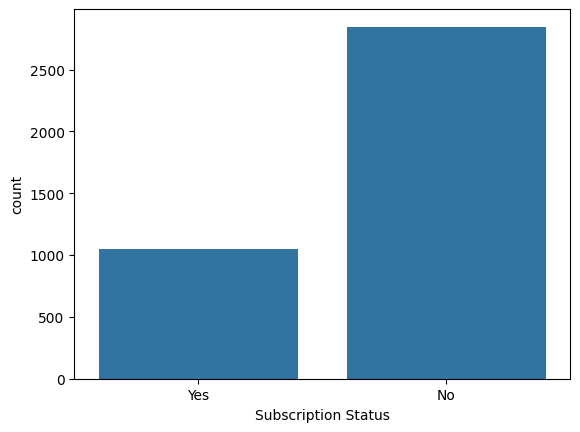

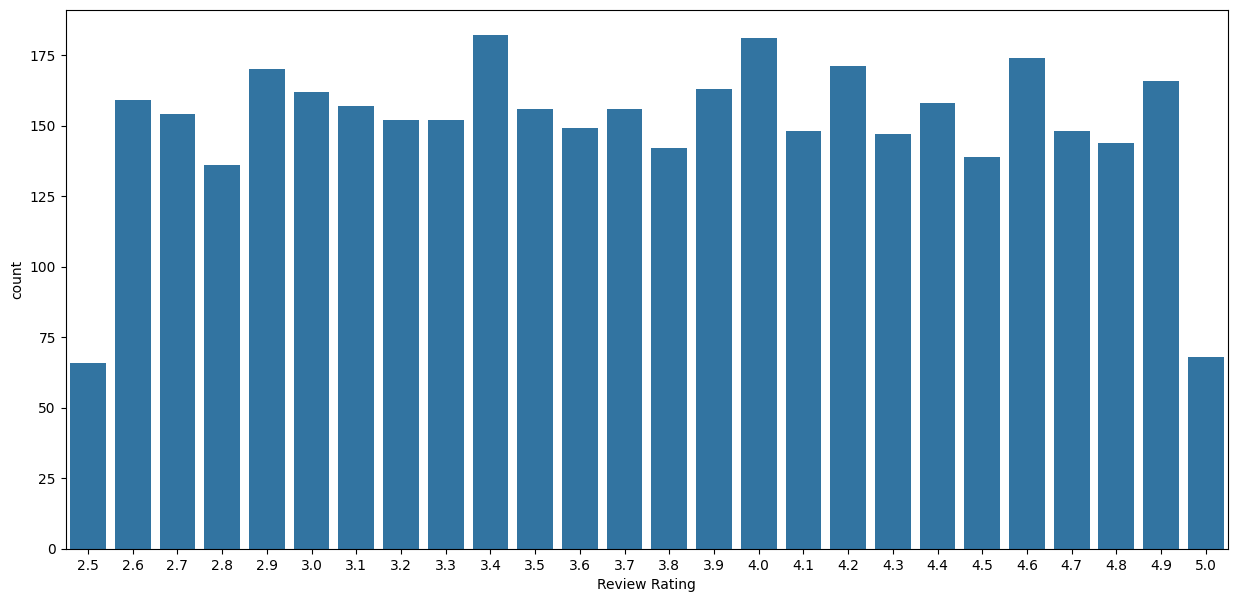

In [51]:
# 8. Subscription Analysis
sns.countplot(x='Subscription Status', data=df_trends)
plt.show()

plt.figure(figsize=(15,7))
# 8. Subscription Analysis
sns.countplot(x='Review Rating', data=df_trends)
plt.show()



In [29]:
# 9. Purchasing Frequency Analysis using Customer ID
customer_frequency = df_trends['Customer ID'].value_counts().reset_index()
customer_frequency.columns = ['Customer ID', 'Purchase Frequency']

# Sort the DataFrame by 'Purchase Frequency' in descending order
customer_frequency = customer_frequency.sort_values(by='Purchase Frequency', ascending=False)

# Display the sorted table
print(customer_frequency)

      Customer ID  Purchase Frequency
0               1                   1
2620           60                   1
2592           30                   1
2593           15                   1
2594            3                   1
...           ...                 ...
1304         3894                   1
1305         3895                   1
1306         3896                   1
1307         3897                   1
3899         3900                   1

[3900 rows x 2 columns]


In [32]:
# 9. Purchasing Frequency Analysis using Customer ID
customer_frequency = df_trends['Customer ID'].value_counts().reset_index()
customer_frequency.columns = ['Customer ID', 'Purchase Frequency']

# Filter customers who purchased more than once
repeat_customers = customer_frequency[customer_frequency['Purchase Frequency'] > 1]

# Sort the DataFrame by 'Purchase Frequency' in descending order
repeat_customers = repeat_customers.sort_values(by='Purchase Frequency', ascending=False)

# Display the table for repeat customers
print("Repeat Customers:")
print(repeat_customers)

# Calculate and print the sum of purchases for customers who bought only once
sum_single_purchases = customer_frequency[customer_frequency['Purchase Frequency'] == 1]['Purchase Frequency'].sum()
print("\nSum of Purchases for Customers who Bought Only Once:", sum_single_purchases)

#

Repeat Customers:
Empty DataFrame
Columns: [Customer ID, Purchase Frequency]
Index: []

Sum of Purchases for Customers who Bought Only Once: 3900


# Comparison analysis with the competition.

In [49]:
dl = %sql SELECT * FROM data_adidasvsnike
df_comp = dl.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

The dataset overview.

In [50]:
df_comp.head(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [51]:
# No null values on data
df_comp.info()
df_comp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


Time series 'Last Visited' gives out date of data retrieval of 36 seconds. No much info there. **Just speaks to the relevance of the analysis aplicability.**

### Data Cleaning and Processing

In [52]:
# Date formatting, and dropping of unuseful data 
df_comp['Last Visited'] = pd.to_datetime(df_comp['Last Visited'])
df_comp = df_comp.drop(columns=['Product ID'], axis = 1)
df_comp.head(5)

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15


In [53]:
# Sale price, Amount it actually sells for
# Listing price, Amount asked by seller
# We look at zero values 

# [(i, j) for i, j in enumerate(mylist)] We drop i
List_price_zeros = [idx for idx, value in enumerate(df_comp['Listing Price']) if value == 0]
Sale_price_zeros = [idx for idx, value in enumerate(df_comp['Sale Price']) if value == 0]
Disc_zeros = [idx for idx, value in enumerate(df_comp['Discount']) if value == 0]
print(f'length of Zeros list on List Price: {len(List_price_zeros)},\n Sale Price: {len(Sale_price_zeros)},\n Discounts: {len(Disc_zeros)}')
# Missing Listings, next best knowledge of price is that of sale, we fill in
df_comp.iloc[List_price_zeros, 1] = df_comp.iloc[List_price_zeros, 2]
# No more gaps
print(f"# of Zeros on Listing Price after standardizing: {len([idx for idx, value in enumerate(df_comp['Listing Price']) if value == 0])}")
# We look at the unique brands
print(df_comp.Brand.unique())
# There appears to be a misnomber, we replace it with apparent correct string
df_comp['Brand'] = df_comp['Brand'].replace('Adidas Adidas ORIGINALS', 'Adidas ORIGINALS')
print(df_comp.Brand.unique())

length of Zeros list on List Price: 426,
 Sale Price: 0,
 Discounts: 1302
# of Zeros on Listing Price after standardizing: 0
['Adidas Adidas ORIGINALS' 'Adidas ORIGINALS' 'Adidas CORE / NEO'
 'Adidas SPORT PERFORMANCE' 'Nike']
['Adidas ORIGINALS' 'Adidas CORE / NEO' 'Adidas SPORT PERFORMANCE' 'Nike']


### EDA of brands

There's a visible use of discounts on Adidas part, and sub-brands give them out approximatlly equally

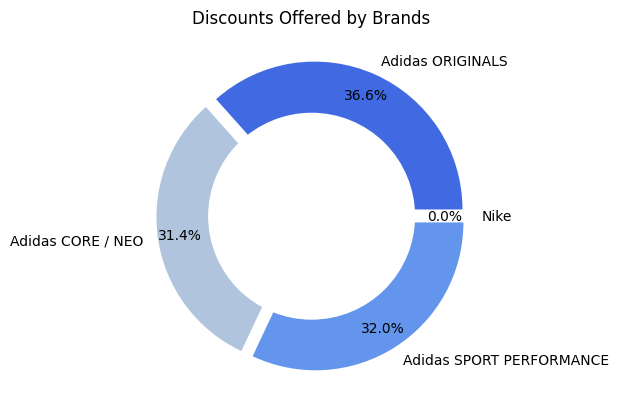

In [54]:
Brands = df_comp.Brand.unique()
 
# Setting size in Chart based on 
# given values
data = df_comp.groupby(['Brand'])['Discount'].mean().to_numpy()
 
# colors
colors = ['royalblue', 'lightsteelblue', 'cornflowerblue', 
          'red']
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(data, colors=colors, labels=Brands,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Discounts Offered by Brands')
 
# Displaying Chart
plt.show()

### Data pairing

In [55]:
# We better group by company, getting together sub-brands and dropping Nike

Nike = df_comp.groupby(['Brand']).get_group('Nike')
subb_list = [df_comp.groupby(['Brand']).get_group(subb) for subb in df_comp.Brand.unique() if subb != 'Nike']
Adidas=pd.concat(subb_list)
Adidas.reset_index(inplace=True,drop=True)

Adidas offers 745 (by the time listed before) more products in general

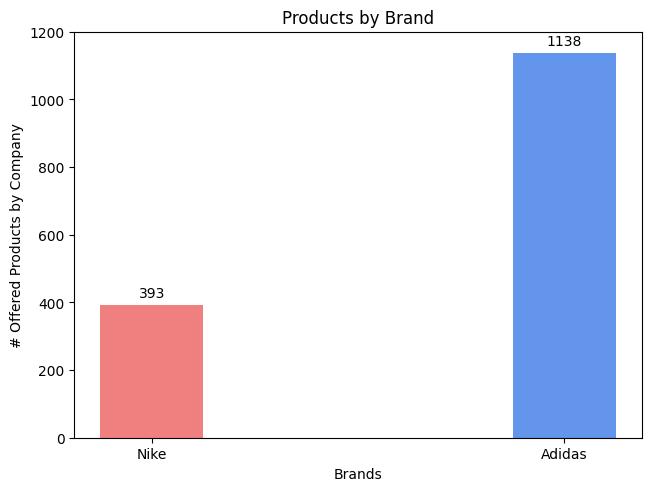

In [56]:
# Count for unique values and count again total
fig, ax = plt.subplots(layout='constrained') 

ax.set_ylabel('# Offered Products by Company')
ax.set_xlabel('Brands')
ax.bar_label(ax.bar(np.arange(len(['Nike', 'Adidas'])) + 0.25, [Nike['Product Name'].value_counts().count(),
                             Adidas['Product Name'].value_counts().count()], 0.25,color = ['lightcoral', 'cornflowerblue']), padding=3)
ax.set_ylim(0, 1200)
ax.set_xticks(np.arange(len(['Nike', 'Adidas'])) + 0.25, ['Nike', 'Adidas'])
ax.set_title('Products by Brand')
plt.show()

The following are the  most purchased products from both brands. Adidas produces more overall common products.

C:\Users\delat\AppData\Local\Temp\ipykernel_9916\442788379.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\delat\AppData\Local\Temp\ipykernel_9916\442788379.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

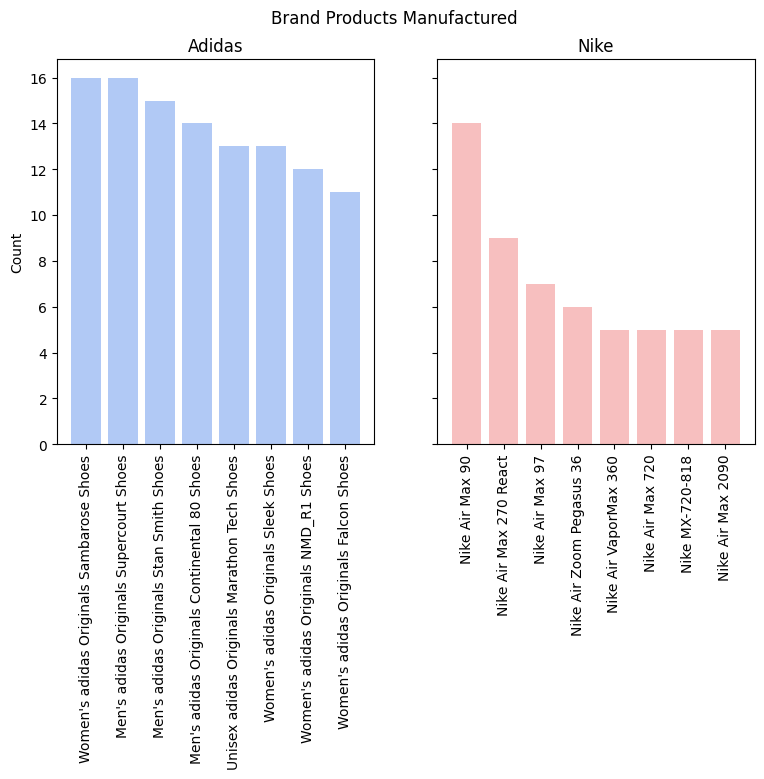

In [57]:
# Inferior limit of 11 count of product, below that not much variability
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,5))
ax[0].bar(Adidas['Product Name'].value_counts().head(8).index,
           Adidas['Product Name'].value_counts().head(8), color='cornflowerblue', alpha=0.5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].bar(Nike['Product Name'].value_counts().head(8).index,
           Nike['Product Name'].value_counts().head(8), color='lightcoral', alpha=0.5)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title('Adidas')
ax[1].set_title('Nike')
fig.suptitle('Brand Products Manufactured')
ax[0].set_ylabel('Count')
plt.show

We look the overall distribution and compare with the descriptive statistics of below. We can see Adidas sells cheaper in average.

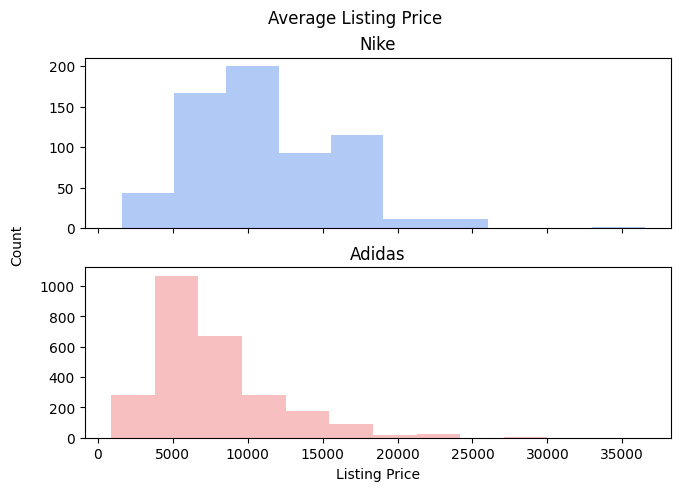

In [58]:
fig, ax = plt.subplots(2,1,sharex=True,layout='constrained')
ax[0].hist(Nike['Listing Price'], histtype='bar', bins=10, alpha=0.5, color='cornflowerblue')
ax[0].set_title('Nike')
ax[1].hist(Adidas['Listing Price'], histtype='bar', bins=10, alpha=0.5, color='lightcoral')
ax[1].set_title('Adidas')
fig.suptitle('Average Listing Price')
ax[1].set_xlabel('Listing Price')
fig.text(-0.04, 0.5, 'Count', va='center', rotation=90)
plt.show()

Poor costumer satisfaction given low mean rating, the std dev of reviews may suggest popularity.

In [59]:
# Consistent with upper dist 
print(f'Nike:\n{Nike.describe()}')

Nike:
       Listing Price    Sale Price  Discount      Rating     Reviews  \
count     643.000000    643.000000     643.0  643.000000  643.000000   
mean    11309.315708  10213.676516       0.0    2.734837    7.181960   
min      1595.000000   1595.000000       0.0    0.000000    0.000000   
25%      7995.000000   6995.000000       0.0    0.000000    0.000000   
50%     10995.000000   9597.000000       0.0    3.800000    1.000000   
75%     14995.000000  12797.000000       0.0    4.600000    6.000000   
max     36500.000000  36500.000000       0.0    5.000000  223.000000   
std      4533.114615   4513.289512       0.0    2.137756   15.968315   

                        Last Visited  
count                            643  
mean   2020-04-13 15:32:43.639191296  
min              2020-04-13 15:27:56  
25%       2020-04-13 15:30:17.500000  
50%              2020-04-13 15:32:34  
75%              2020-04-13 15:34:57  
max              2020-04-13 15:42:57  
std                              

Slight increase of 0.63 on mean rating, The low difference might also be because of lower quality products
(given the cheapness and notable discounts)
 Adidas dev is more so a fact of number of offered products, having Nike the shorter end.

In [60]:
print(f'Adidas:\n{Adidas.describe()}')

Adidas:
       Listing Price    Sale Price     Discount       Rating      Reviews  \
count    2625.000000   2625.000000  2625.000000  2625.000000  2625.000000   
mean     7600.980952   5135.004190    33.459048     3.366362    48.725714   
min       899.000000    449.000000     0.000000     0.000000     0.000000   
25%      4999.000000   2799.000000     0.000000     2.700000    24.000000   
50%      6599.000000   3999.000000    40.000000     3.500000    49.000000   
75%      8999.000000   6499.000000    50.000000     4.300000    74.000000   
max     29999.000000  29999.000000    60.000000     5.000000    99.000000   
std      4071.014515   3589.990374    20.431622     1.159873    28.926042   

                        Last Visited  
count                           2625  
mean   2020-04-13 15:07:07.829333248  
min              2020-04-13 15:06:14  
25%              2020-04-13 15:06:41  
50%              2020-04-13 15:07:07  
75%              2020-04-13 15:07:35  
max              2020-04-

In [62]:
print(len(Nike[Nike.Rating == Nike.Rating.max()]))

120


Again we see Adidas has less equally highly rated products on sale as Nike does given the ratings.

In [61]:
print(len(Adidas[Adidas.Rating == Adidas.Rating.max()]))

87
